In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight_values.csv')

In [3]:
df.head()

,raw_weight,time_raw_weight,avg_10,time_avg_10,avg_100,time_avg_100,avg_1000,time_avg_1000,flt_10,time_flt_10,flt_100,time_flt_100,flt_1000,time_flt_1000
0,1947781.6,0.379088,1994809.96,9.466743,1828306.296,70.757435,1.807430e+06,724.460363,1.447428e+06,5.935761,1.946057e+06,72.446647,1.945250e+06,718.725324
1,1944354.8,0.358096,1944416.44,6.835301,1769103.692,65.139035,1.834875e+06,709.410549,1.942217e+06,7.797224,1.942249e+06,63.914740,1.941647e+06,696.647582
2,1941089.8,0.473293,1873356.98,6.859169,1836140.744,78.776150,1.873995e+06,716.160714,1.939587e+06,5.729127,1.939593e+06,77.360831,1.939117e+06,718.945948
3,1938580.8,0.389009,1818920.72,6.355805,1936887.608,75.863008,1.886941e+06,703.712940,1.937633e+06,6.451426,1.937593e+06,71.653924,1.937027e+06,726.793520
4,1937810.0,1.161280,2023200.52,7.650723,1852887.946,71.614461,1.865722e+06,710.064244,1.935380e+06,7.910441,1.935321e+06,66.979966,1.934813e+06,718.643955


In [4]:
weights_columns = ['raw_weight', 'avg_10', 'avg_100', 'avg_1000', 'flt_10', 'flt_100', 'flt_1000']
weights_data = df[weights_columns]
times_columns = ['time_raw_weight', 'time_avg_10', 'time_avg_100', 'time_avg_1000', 'time_flt_10', 'time_flt_100', 'time_flt_1000']
times_data = df[times_columns]

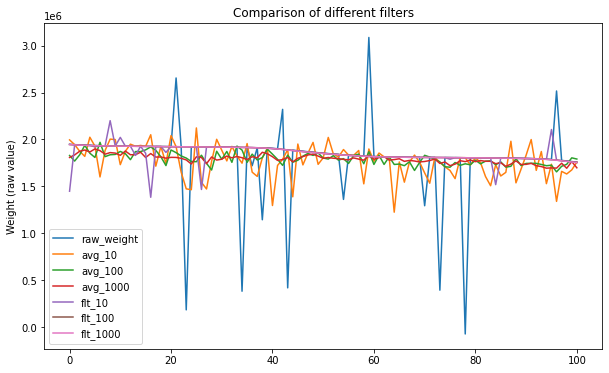

In [5]:
# Plotting the weights graph (with raw values, and raw_weight)
plt.figure(figsize=(10, 6))
for column in weights_columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Comparison of different filters')
plt.ylabel('Weight (raw value)')
plt.legend()
plt.show()

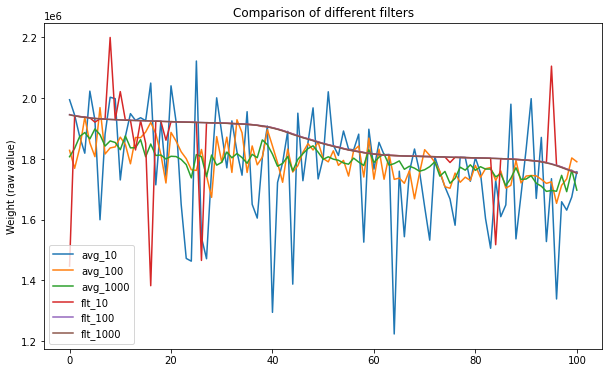

In [6]:
# Plotting the weights graph (with raw values but without raw_weight)
weights_columns = ['avg_10', 'avg_100', 'avg_1000', 'flt_10', 'flt_100', 'flt_1000']
weights_data = df[weights_columns]

plt.figure(figsize=(10, 6))
for column in weights_columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Comparison of different filters')
plt.ylabel('Weight (raw value)')
plt.legend()
plt.show()

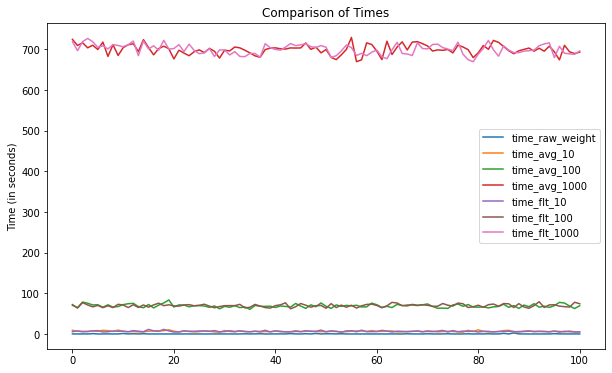

In [7]:
# Plotting the times graph
plt.figure(figsize=(10, 6))
for column in times_columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Comparison of Times')
plt.ylabel('Time (in seconds)')
plt.legend()
plt.show()

In [8]:
# Convert to grams
# Load cell calibration values:
# load_cell_cal = -92.5925925926924
# load_cell_coef_g = 0.0007085302684130668

weights_columns = ['raw_weight', 'avg_10', 'avg_100', 'avg_1000', 'flt_10', 'flt_100', 'flt_1000']
for column in weights_columns:
    df[column] = df[column] * 0.0007085302684130668

0 raw_weight
1 avg_10
2 avg_100
3 avg_1000
4 flt_10
5 flt_100
6 flt_1000


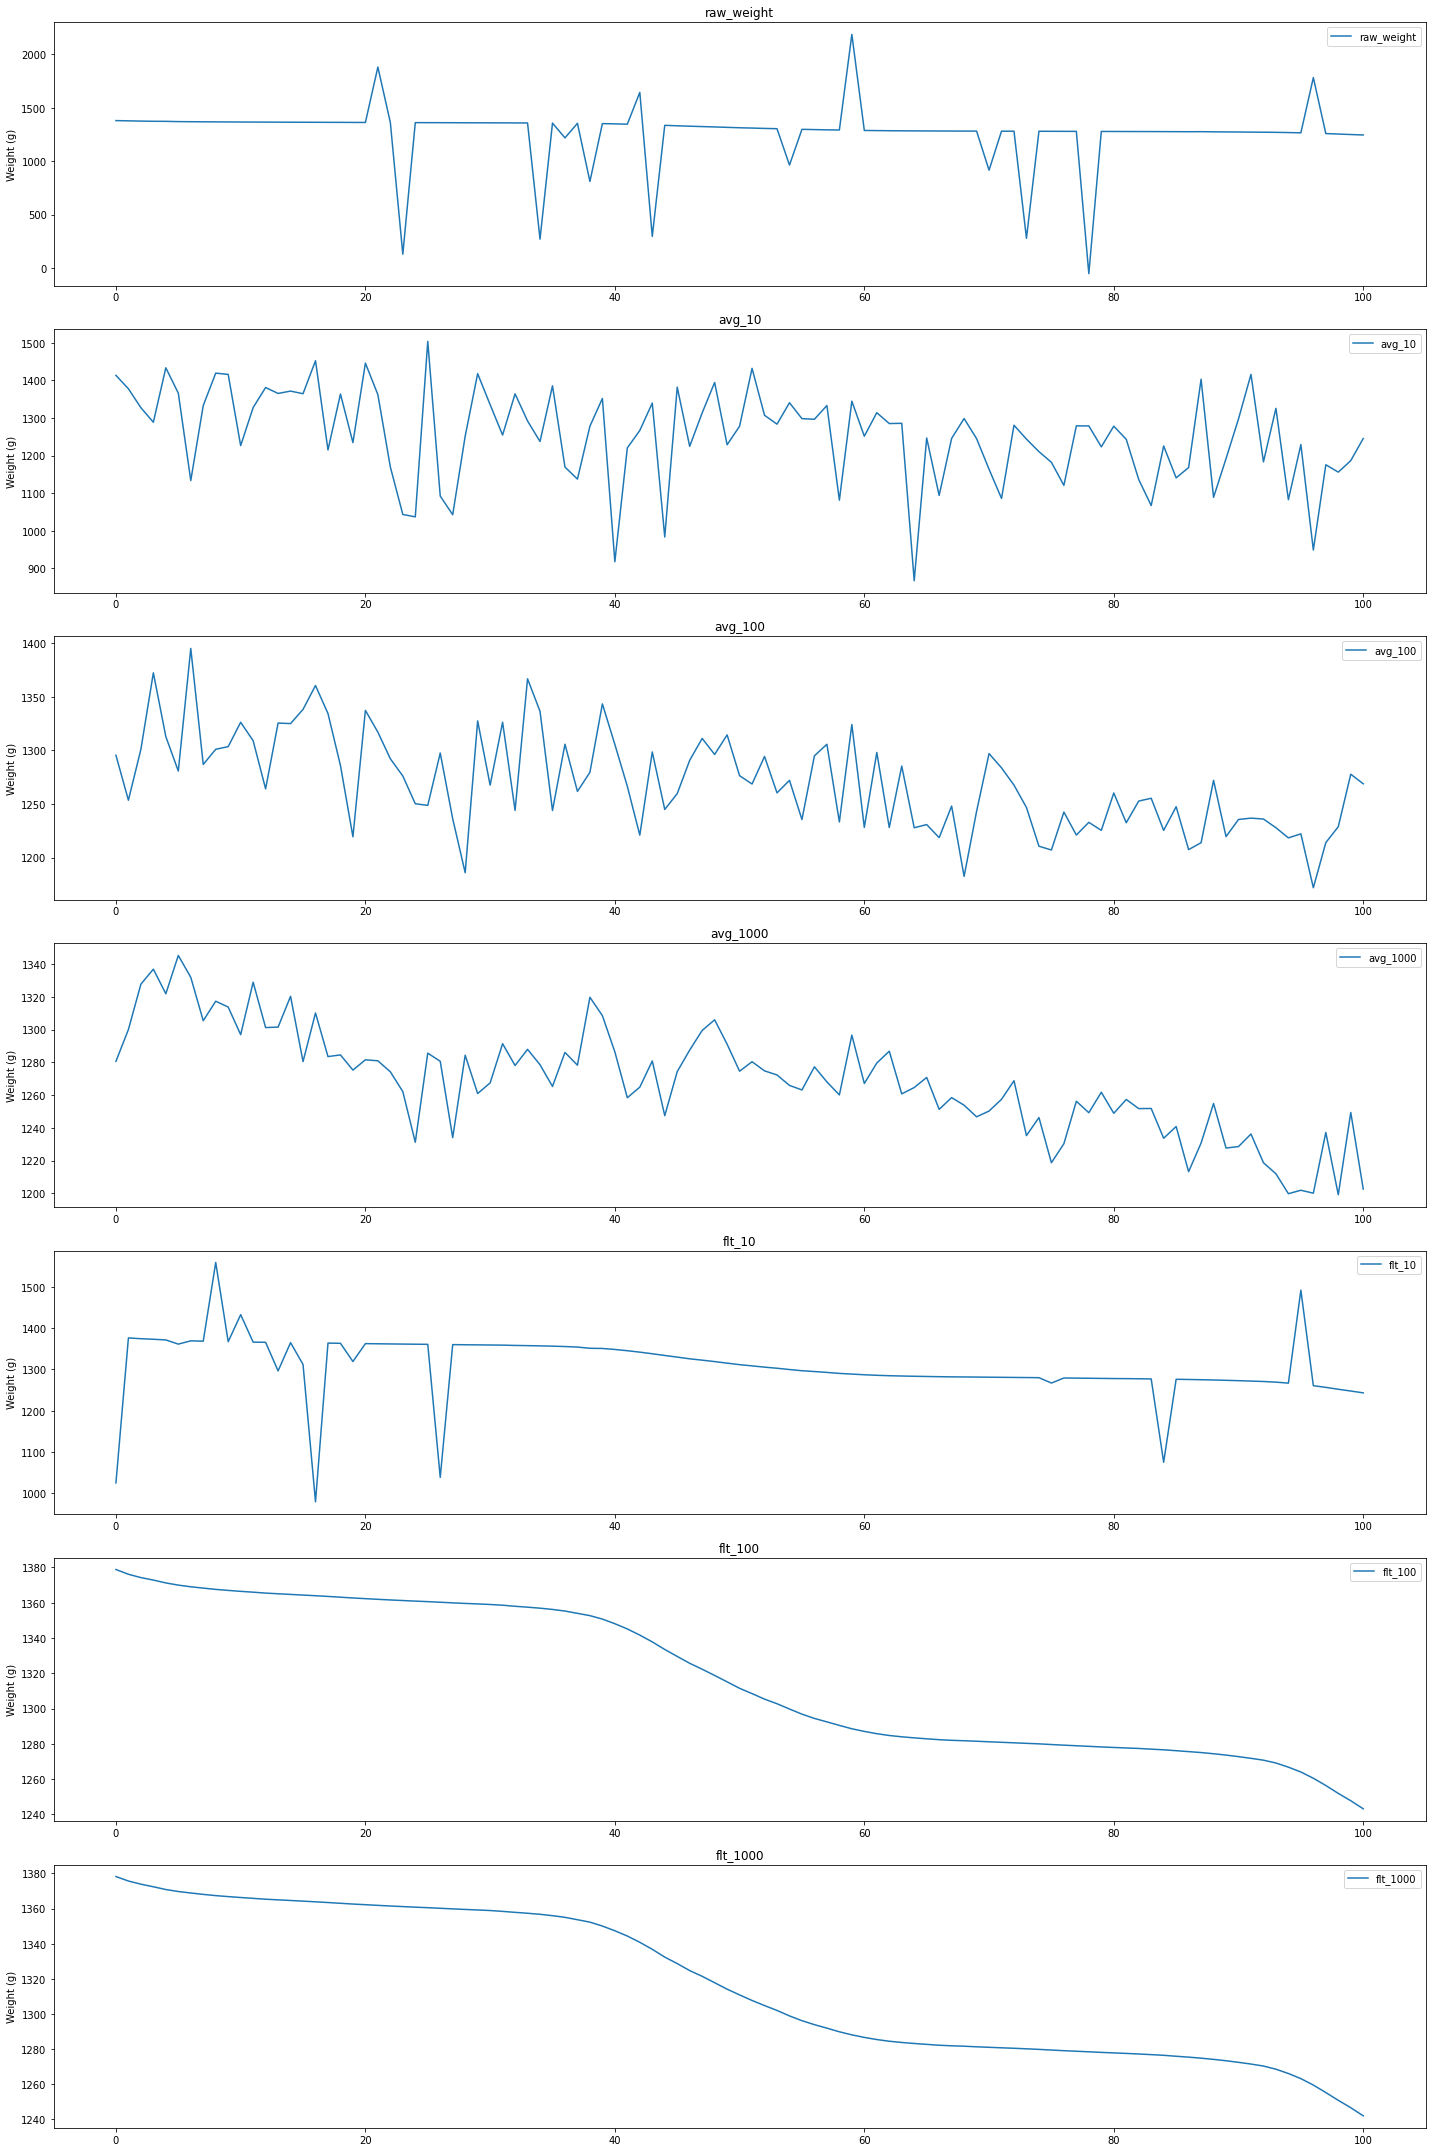

In [9]:
# Plotting weights with different subplots to see the differences
weights_columns = ['raw_weight', 'avg_10', 'avg_100', 'avg_1000', 'flt_10', 'flt_100', 'flt_1000']

num_columns = 1
num_rows = len(weights_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 30))

for i, column in enumerate(weights_columns):
    print(i, column)
    ax = axs[i // num_columns]
    ax.plot(df.index, df[column], label=column)
    ax.set_title(f'{column}')
    ax.set_ylabel('Weight (g)')
    ax.legend()

plt.tight_layout()
plt.show()

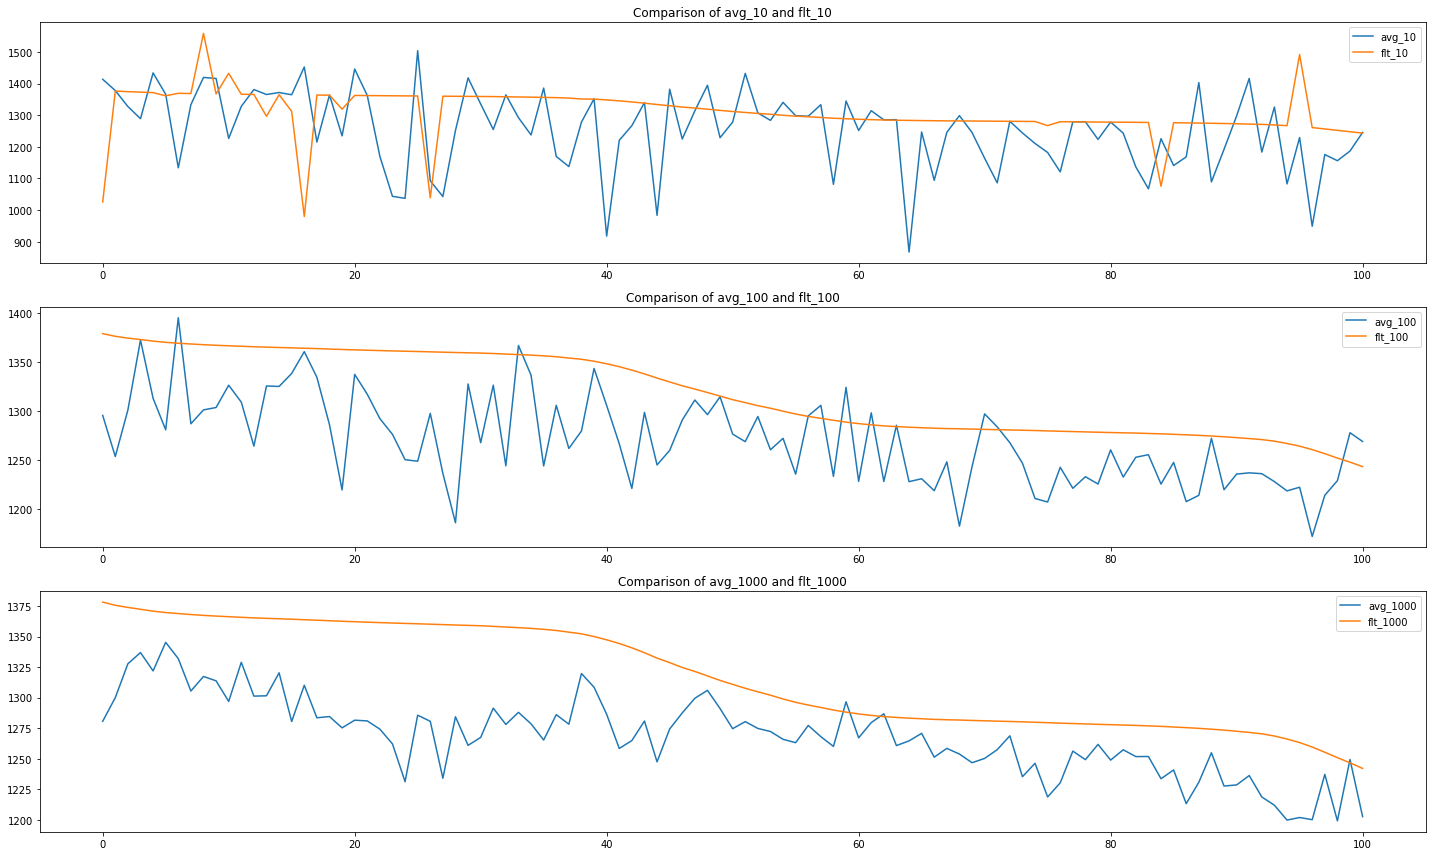

In [10]:
# Comparing each weight filter 2 by 2
weights_columns = ['avg_10', 'avg_100', 'avg_1000', 'flt_10', 'flt_100', 'flt_1000']

fig, axs = plt.subplots(3, 1, figsize=(20, 12))

# "avg_10" vs "flt_10"
axs[0].plot(df.index, df['avg_10'], label='avg_10')
axs[0].plot(df.index, df['flt_10'], label='flt_10')
axs[0].set_title('Comparison of avg_10 and flt_10')
axs[0].legend()

# "avg_100" vs "flt_100"
axs[1].plot(df.index, df['avg_100'], label='avg_100')
axs[1].plot(df.index, df['flt_100'], label='flt_100')
axs[1].set_title('Comparison of avg_100 and flt_100')
axs[1].legend()

# "avg_1000" vs "flt_1000"
axs[2].plot(df.index, df['avg_1000'], label='avg_1000')
axs[2].plot(df.index, df['flt_1000'], label='flt_1000')
axs[2].set_title('Comparison of avg_1000 and flt_1000')
axs[2].legend()

plt.tight_layout()
plt.show()

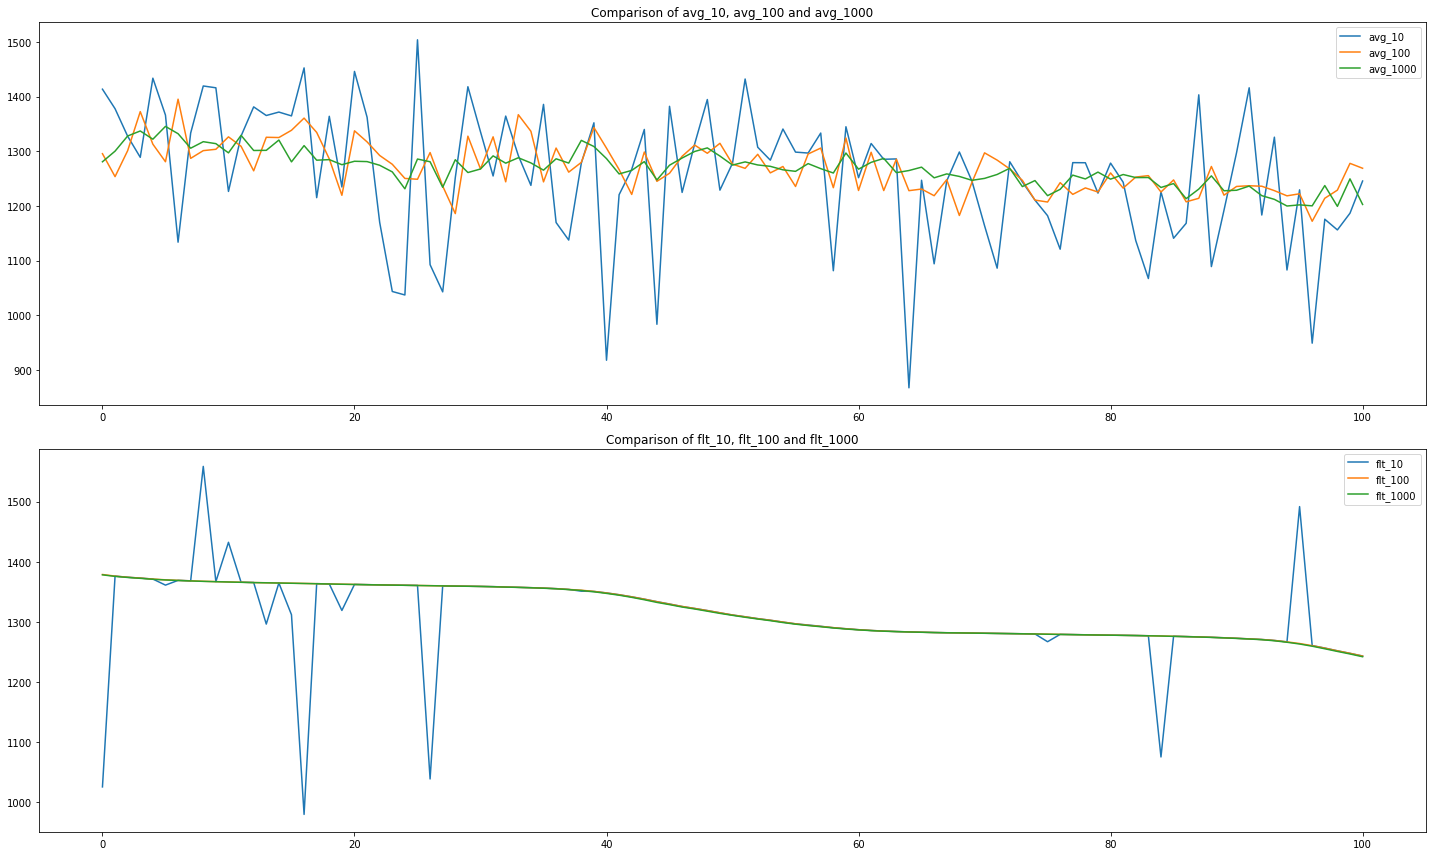

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# "avg_10" vs "avg_100" vs "avg_1000"
axs[0].plot(df.index, df['avg_10'], label='avg_10')
axs[0].plot(df.index, df['avg_100'], label='avg_100')
axs[0].plot(df.index, df['avg_1000'], label='avg_1000')
axs[0].set_title('Comparison of avg_10, avg_100 and avg_1000')
axs[0].legend()

# "flt_10" vs "flt_100" vs "flt_1000"
axs[1].plot(df.index, df['flt_10'], label='flt_10')
axs[1].plot(df.index, df['flt_100'], label='flt_100')
axs[1].plot(df.index, df['flt_1000'], label='flt_1000')
axs[1].set_title('Comparison of flt_10, flt_100 and flt_1000')
axs[1].legend()

plt.tight_layout()
plt.show()

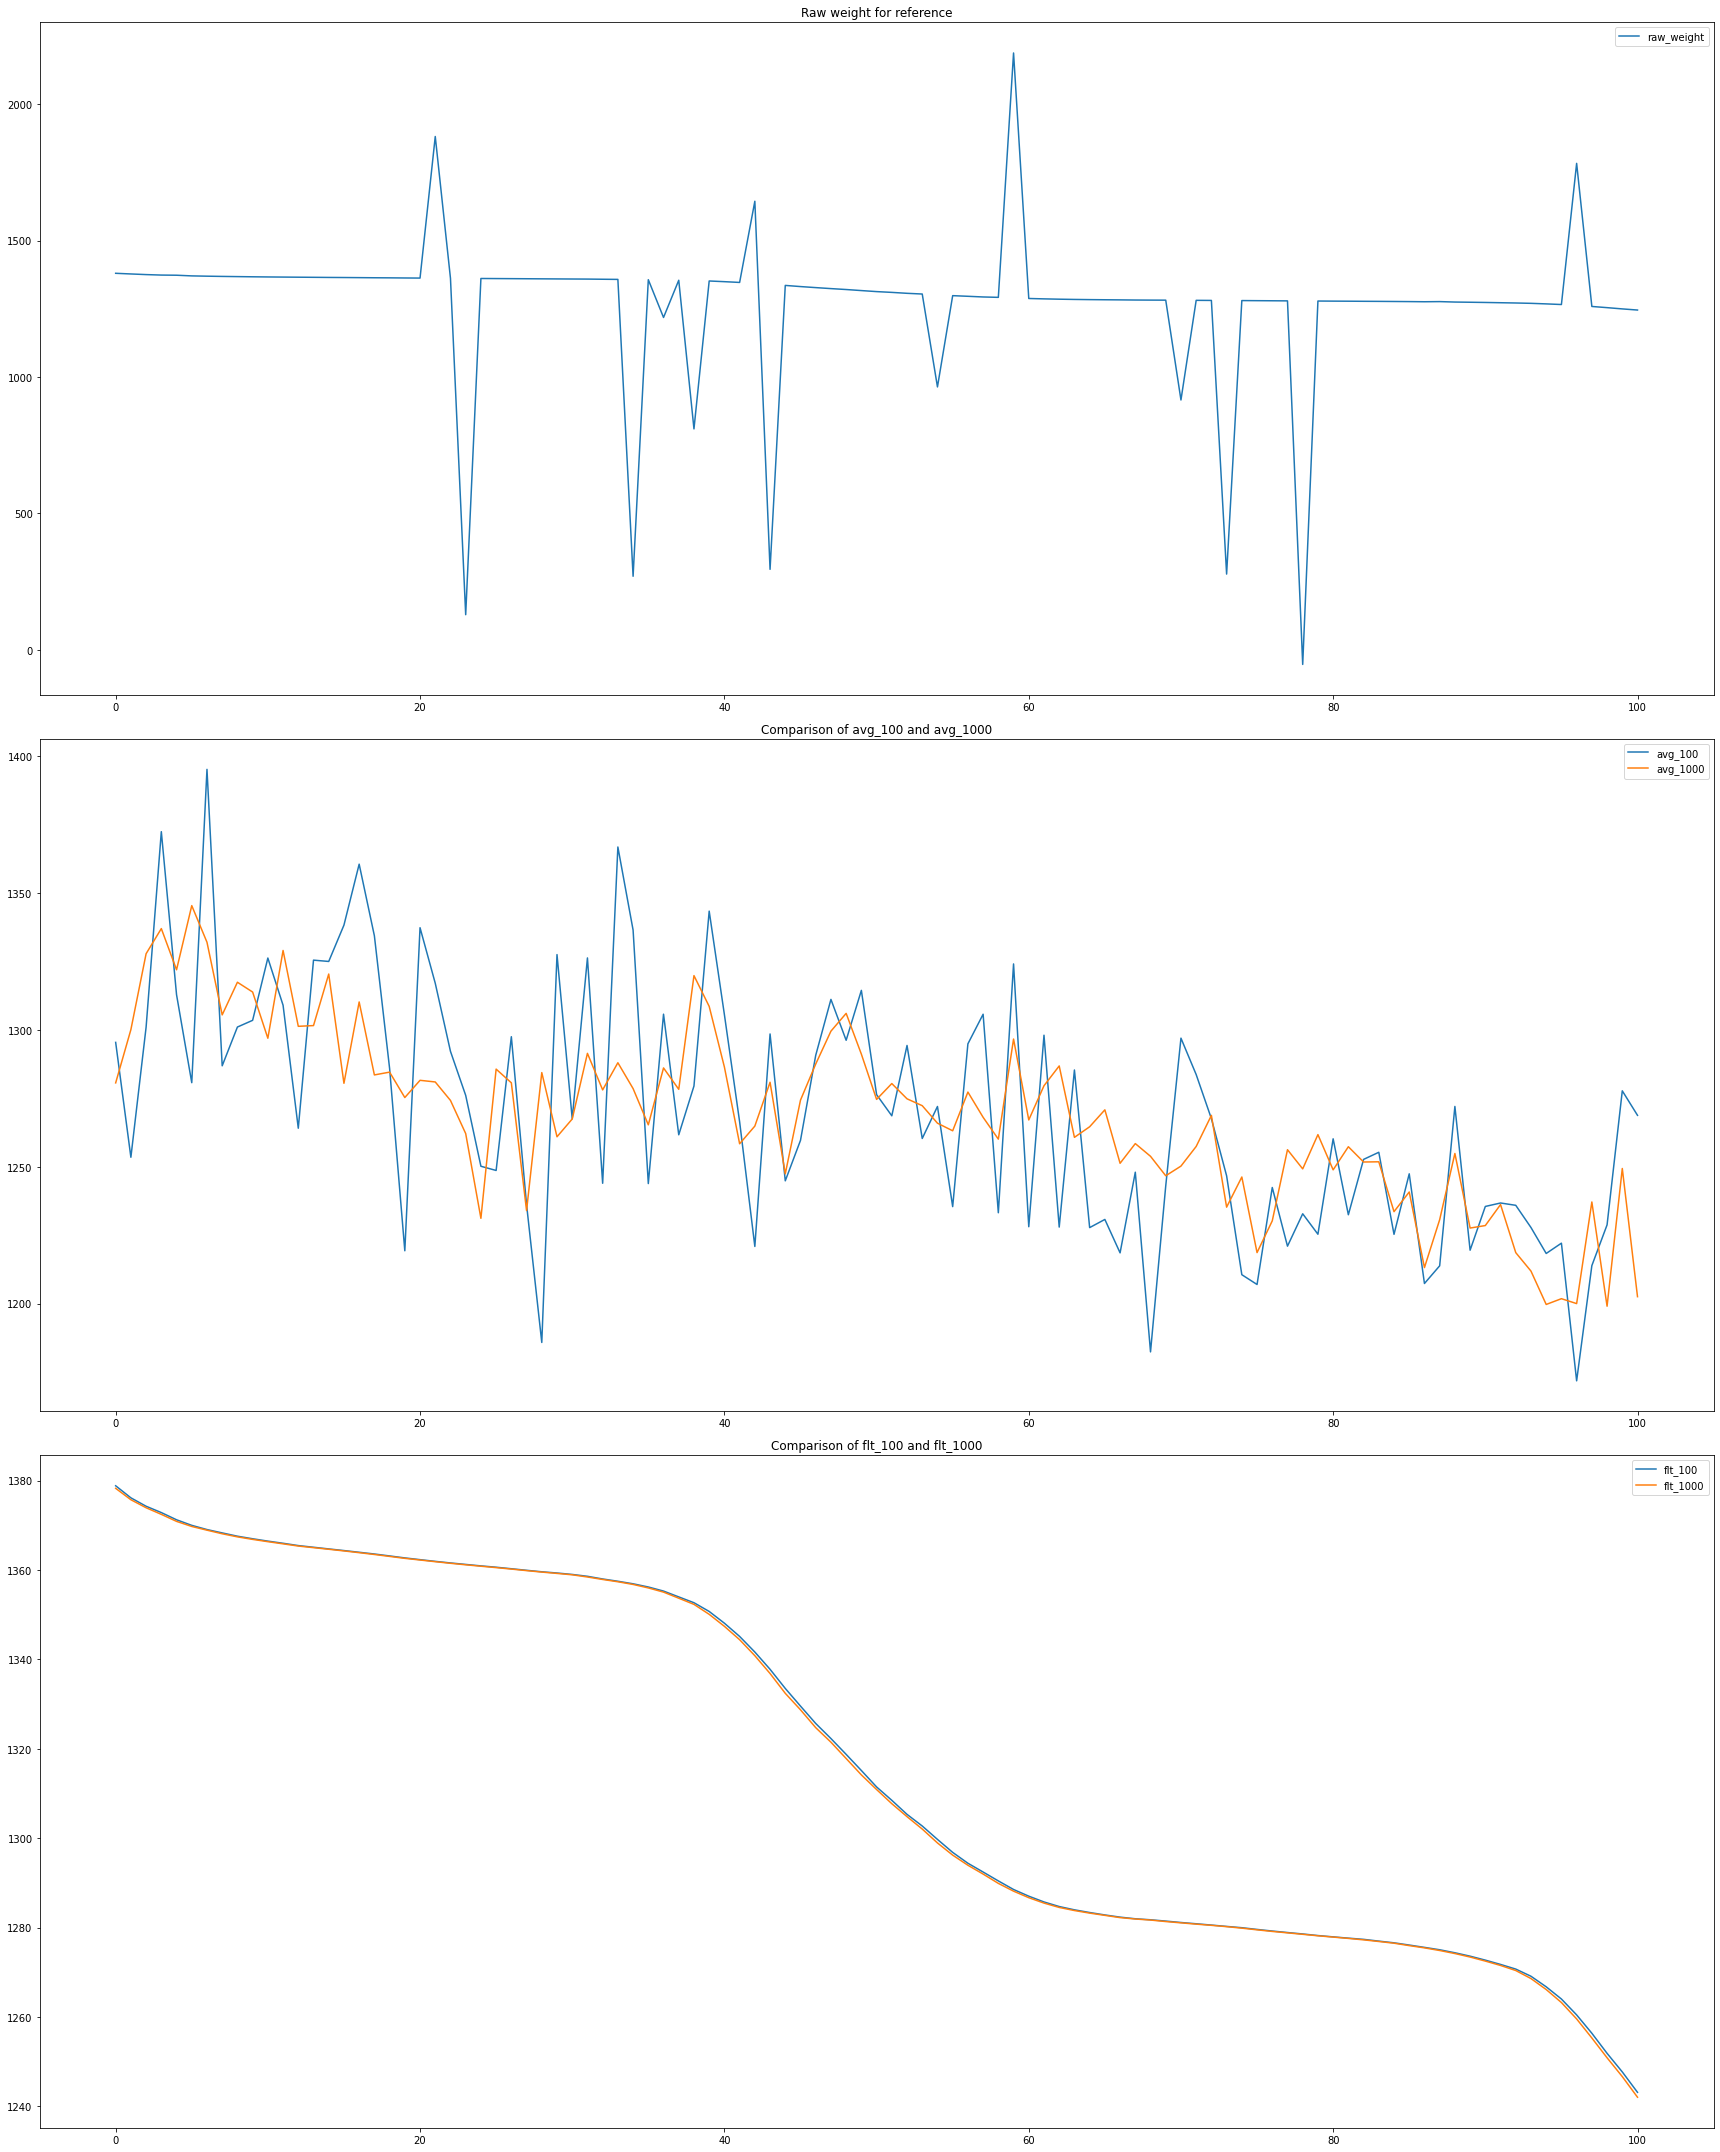

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(24, 30))

# Raw_weight for reference
axs[0].plot(df.index, df['raw_weight'], label='raw_weight')
axs[0].set_title('Raw weight for reference')
axs[0].legend()


# "avg_100" vs "avg_1000"
axs[1].plot(df.index, df['avg_100'], label='avg_100')
axs[1].plot(df.index, df['avg_1000'], label='avg_1000')
axs[1].set_title('Comparison of avg_100 and avg_1000')
axs[1].legend()

# "flt_100" vs "flt_1000"
axs[2].plot(df.index, df['flt_100'], label='flt_100')
axs[2].plot(df.index, df['flt_1000'], label='flt_1000')
axs[2].set_title('Comparison of flt_100 and flt_1000')
axs[2].legend()

plt.tight_layout()
plt.show()